In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

In [6]:
df = pd.read_csv("/content/Telco_customer_churnn.csv")

In [7]:
print("🔍 Data Overview:")
print("Shape:", df.shape)
print(df.head())
print(df.info())


🔍 Data Overview:
Shape: (7043, 33)
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             P

In [8]:
if 'Customer ID' in df.columns:
    df.drop('Customer ID', axis=1, inplace=True)

In [9]:
if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

<ipython-input-9-09cde573a81b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [19]:
df['Churn'] = df['CustomerID'].apply(lambda x: 1 if x == 'Churned' else 0)

In [11]:
categorical = df.select_dtypes(include='object').columns
encoder = LabelEncoder()
for feature in categorical:
    df[feature] = encoder.fit_transform(df[feature])


In [21]:
X_features = df.drop(['Churn', 'CustomerID', 'Country', 'Churn Reason'], axis=1)
y_target = df['Churn']

In [22]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_features)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_target, test_size=0.2, random_state=0)

In [26]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [27]:
predictions = rf_model.predict(X_test)

print("✅ Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nDetailed Report:\n", classification_report(y_test, predictions))




✅ Model Evaluation:
Accuracy Score: 1.0

Confusion Matrix:
 [[1409]]

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [28]:
importance_vals = rf_model.feature_importances_
sorted_idx = np.argsort(importance_vals)[::-1]
feature_names = X_features.columns





<ipython-input-31-6d276ef0d17d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-6d276ef0d17d>:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


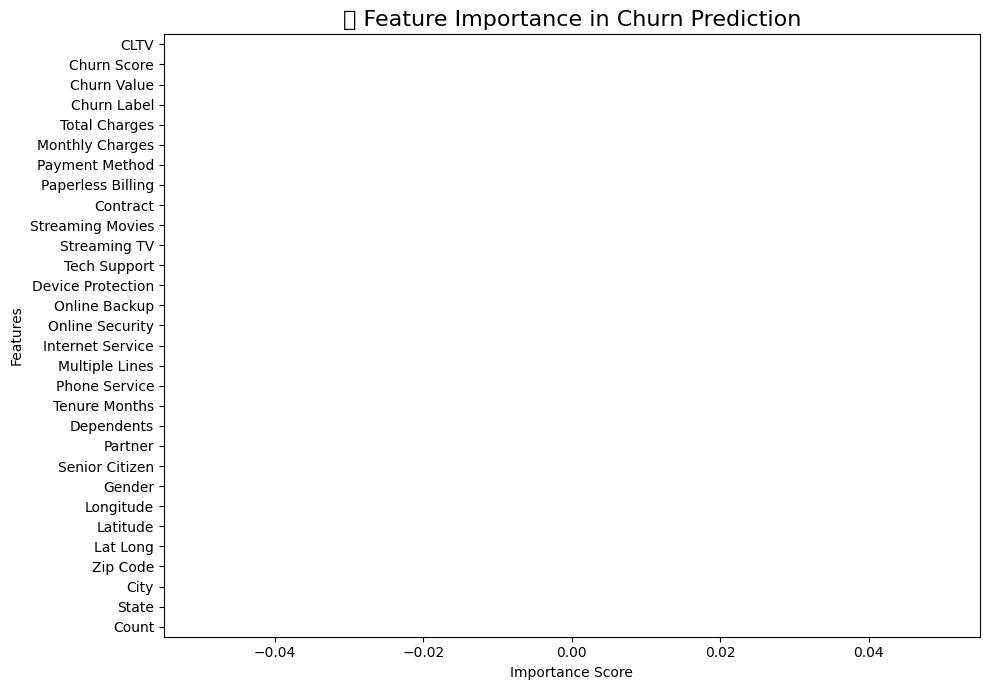

In [31]:
plt.figure(figsize=(10, 7))
sns.barplot(
    x=importance_vals[sorted_idx],
    y=feature_names[sorted_idx],
    palette=sns.color_palette("coolwarm", len(feature_names))
)
plt.title("🎯 Feature Importance in Churn Prediction", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()